In [26]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [28]:
database =connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [29]:
cur = database.cursor()

In [30]:
query = 'SELECT * FROM car_loan_dti;'

cur.execute(query)

393

In [31]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_48812\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [32]:
# Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
1     1697    Male   24  20-30 years         Single                 4   
2     1073    Male   51  50-60 years        Married                 1   
3      954  Female   24  20-30 years         Single                 2   
4      302  Female   39  30-40 years        Married                 4   
6     1478  Female   29  20-30 years         Single                 2   

  educational_level employment_type geographical_location type_of_residence  \
1          Bachelor        Salaried                 Urban            Rented   
2       High School   Self-employed                 Urban            Rented   
3             Ph.D.   Self-employed                 Urban             Owned   
4          Bachelor        Salaried                 Urban      With Parents   
6          Bachelor      Unemployed                 Rural             Owned   

   ...  loan_amount Loan_bins  loan_term_yrs  loan_

In [10]:
df.count()

loan_id                       381
gender                        381
age                           381
AgeGroup                      381
marital_status                381
no_of_dependents              381
educational_level             381
employment_type               381
geographical_location         381
type_of_residence             381
income_annum                  381
income_buckets                381
MonthlySalary                 381
monthly_obligations           381
DTI                           381
savings_account_balance       381
Savings_bins                  381
investment_portfolio_value    381
investment_bins               381
insurance_policies            381
insurance_bins                381
loan_amount                   381
Loan_bins                     381
loan_term_yrs                 381
loan_purpose                  381
approval_status               381
previous_loan_experience      381
credit_history                381
cibil_score                   381
cibil_scorebin

In [11]:
# Create a contingency table for Credit History vs Approval Status
credit_history_vs_approval = pd.crosstab(df['credit_history'], df['approval_status'])

# Display the contingency table
print("Contingency Table: Credit History vs Approval Status")
print(credit_history_vs_approval)


Contingency Table: Credit History vs Approval Status
approval_status  Approved  Rejected
credit_history                     
Excellent              21         8
Fair                    9         7
Good                  121        45
NA/NH                   4         4
Poor                   53        20
Very Good              57        32


In [12]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(credit_history_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=credit_history_vs_approval.index, columns=credit_history_vs_approval.columns))
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Credit History and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Credit History and Approval Status.")




Chi-Square Test Results:
Chi-Square Statistic: 5.362912525560368
P-Value: 0.37321222395086195
Degrees of Freedom: 5

Expected Frequencies Table:
approval_status    Approved   Rejected
credit_history                        
Excellent         20.170604   8.829396
Fair              11.128609   4.871391
Good             115.459318  50.540682
NA/NH              5.564304   2.435696
Poor              50.774278  22.225722
Very Good         61.902887  27.097113

Fail to reject the null hypothesis: There is no significant association between Credit History and Approval Status.


In [13]:
# Step 1: Prepare the Contingency Table
employment_vs_approval = pd.crosstab(df['employment_type'], df['approval_status'])

# Display the contingency table
print("Contingency Table: Employment Type vs Approval Status")
print(employment_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(employment_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=employment_vs_approval.index, columns=employment_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Employment Type and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Employment Type and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_type', hue='approval_status', palette='viridis')
plt.title('Employment Type vs Approval Status')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: Employment Type vs Approval Status
approval_status  Approved  Rejected
employment_type                    
Government             49        15
Salaried              147        62
Self-employed          69        37
Unemployed              0         2

Chi-Square Test Results:
Chi-Square Statistic: 7.109198753291709
P-Value: 0.06849749235334865
Degrees of Freedom: 3

Expected Frequencies Table:
approval_status    Approved   Rejected
employment_type                       
Government        44.514436  19.485564
Salaried         145.367454  63.632546
Self-employed     73.727034  32.272966
Unemployed         1.391076   0.608924

Fail to reject the null hypothesis: There is no significant association between Employment Type and Approval Status.


Contingency Table: income_buckets vs Approval Status
approval_status  Approved  Rejected
income_buckets                     
0-5 Lakhs              29        12
10-15 Lakhs            75        21
15-20 Lakhs            69        48
5-10 Lakhs             92        35

Chi-Square Test Results:
Chi-Square Statistic: 10.041027220905594
P-Value: 0.018220589126948437
Degrees of Freedom: 3

Expected Frequencies Table:
approval_status   Approved   Rejected
income_buckets                       
0-5 Lakhs        28.517060  12.482940
10-15 Lakhs      66.771654  29.228346
15-20 Lakhs      81.377953  35.622047
5-10 Lakhs       88.333333  38.666667

Reject the null hypothesis: There is a significant association between income and Approval Status.


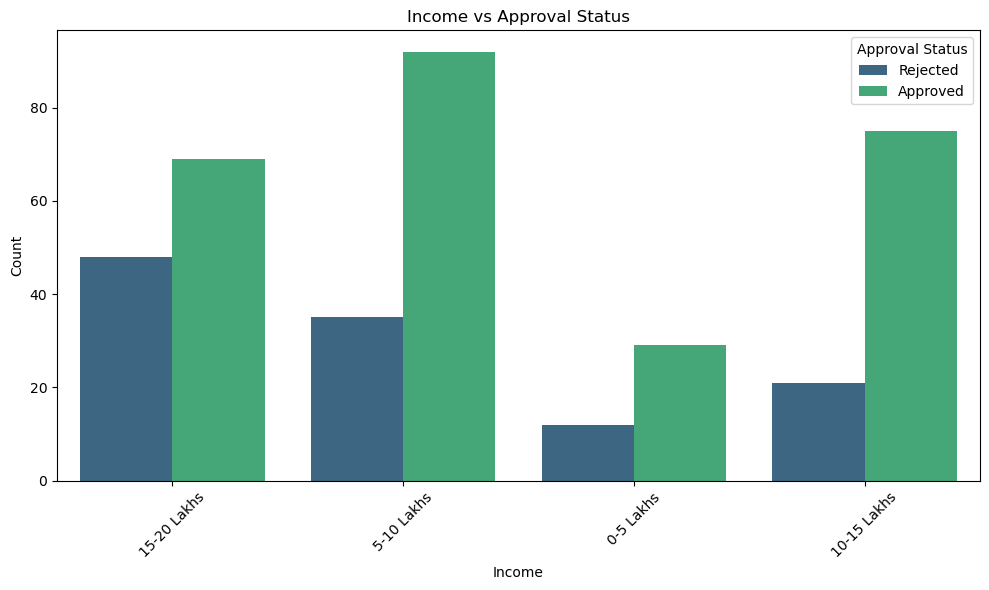

In [14]:
# Step 1: Prepare the Contingency Table
income_vs_approval = pd.crosstab(df['income_buckets'], df['approval_status'])

# Display the contingency table
print("Contingency Table: income_buckets vs Approval Status")
print(income_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(income_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=income_vs_approval.index, columns=income_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between income and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between income and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income_buckets', hue='approval_status', palette='viridis')
plt.title('Income vs Approval Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


In [25]:
# Step 1: Prepare the Contingency Table
DTI_vs_approval = pd.crosstab(df['DTI_Value'], df['approval_status'])

# Display the contingency table
print("Contingency Table: income_buckets vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(DTI_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=DTI_vs_approval.index, columns=DTI_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between DTI and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between DTI and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DTI_Value', hue='approval_status', palette='viridis')
plt.title('DTI vs Approval Status')
plt.xlabel('DTI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: income_buckets vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 0.12224483559057252
P-Value: 0.7266124233803144
Degrees of Freedom: 1

Expected Frequencies Table:
approval_status    Approved    Rejected
DTI_Value                              
DTI<=42%         393.630319  191.369681
DTI>42%          112.369681   54.630319

Fail to reject the null hypothesis: There is no significant association between DTI and Approval Status.


Since the P-Value (0.727) is greater than the significance level (0.05), we fail to reject the null hypothesis. This means that there is no evidence of a significant association between DTI Value and Approval Status.

Key Insights
The Chi-Square Statistic is quite low (0.122), which suggests that there isn't much difference between the observed and expected frequencies.
The high P-Value implies that DTI value is not a significant factor affecting loan approval. The approval rate for DTI <= 42% and DTI > 42% seems consistent, meaning that the DTI ratio alone does not explain the difference between approvals and rejections.


Contingency Table: savings vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 0.9763646325014887
P-Value: 0.9133584551723192
Degrees of Freedom: 4

Expected Frequencies Table:
approval_status    Approved   Rejected
Savings_bins                          
 0-1L             98.239362  47.760638
1L-2L            113.042553  54.957447
2L-3L             97.566489  47.433511
3L-4L             96.220745  46.779255
4L-5L            100.930851  49.069149

Fail to reject the null hypothesis: There is no significant association between savings and Approval Status.


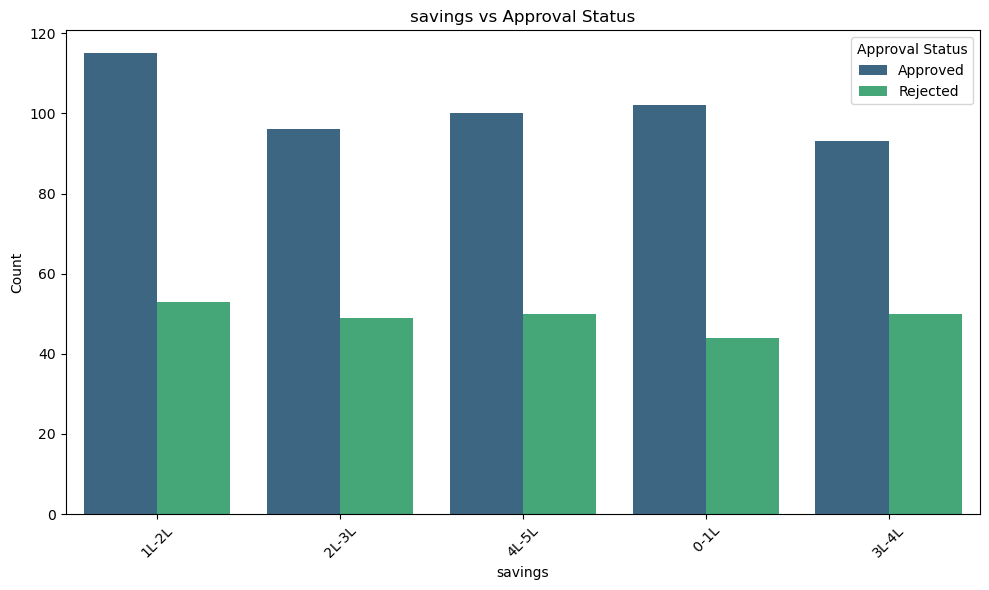

In [22]:
# Step 1: Prepare the Contingency Table
savings_vs_approval = pd.crosstab(df['Savings_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: savings vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(savings_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=savings_vs_approval.index, columns=savings_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between savings and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between savings and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Savings_bins', hue='approval_status', palette='viridis')
plt.title('savings vs Approval Status')
plt.xlabel('savings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: investment vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 9.264674401459624
P-Value: 0.05481383182136742
Degrees of Freedom: 4

Expected Frequencies Table:
approval_status    Approved   Rejected
investment_bins                       
 0-2L             94.875000  46.125000
2L-4L            106.986702  52.013298
4L-6L            100.930851  49.069149
6L-8L            123.135638  59.864362
8L-10L            80.071809  38.928191

Fail to reject the null hypothesis: There is no significant association between investment and Approval Status.


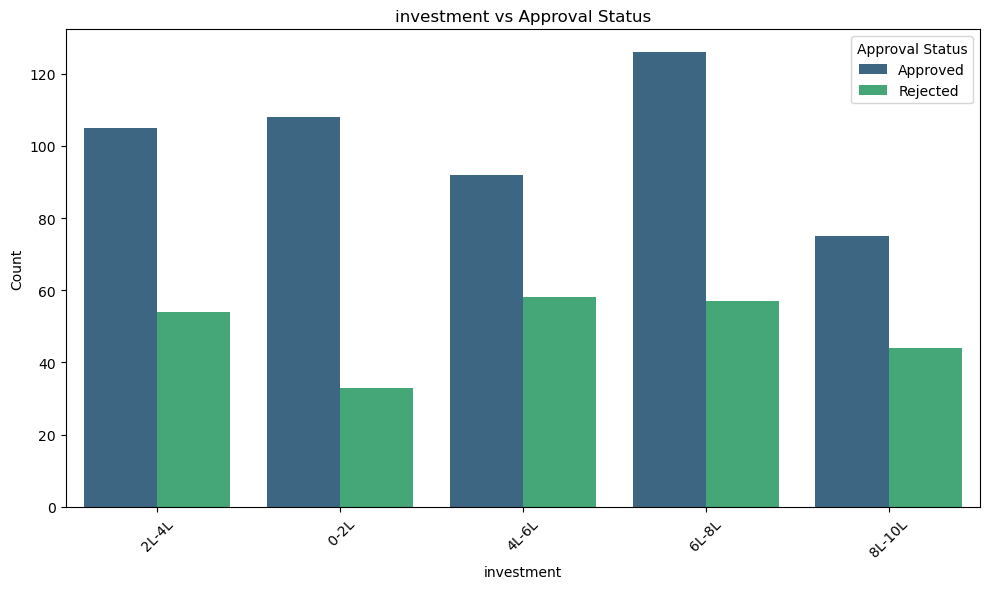

In [23]:
# Step 1: Prepare the Contingency Table
investment_vs_approval = pd.crosstab(df['investment_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: investment vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(investment_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=investment_vs_approval.index, columns=investment_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between investment and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between investment and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='investment_bins', hue='approval_status', palette='viridis')
plt.title('investment vs Approval Status')
plt.xlabel('investment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: investment vs Approval Status
approval_status  Approved  Rejected
Loan_bins                          
 0-1Cr                265       116

Chi-Square Test Results:
Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 0

Expected Frequencies Table:
approval_status  Approved  Rejected
Loan_bins                          
 0-1Cr              265.0     116.0

Fail to reject the null hypothesis: There is no significant association between loan amount and Approval Status.


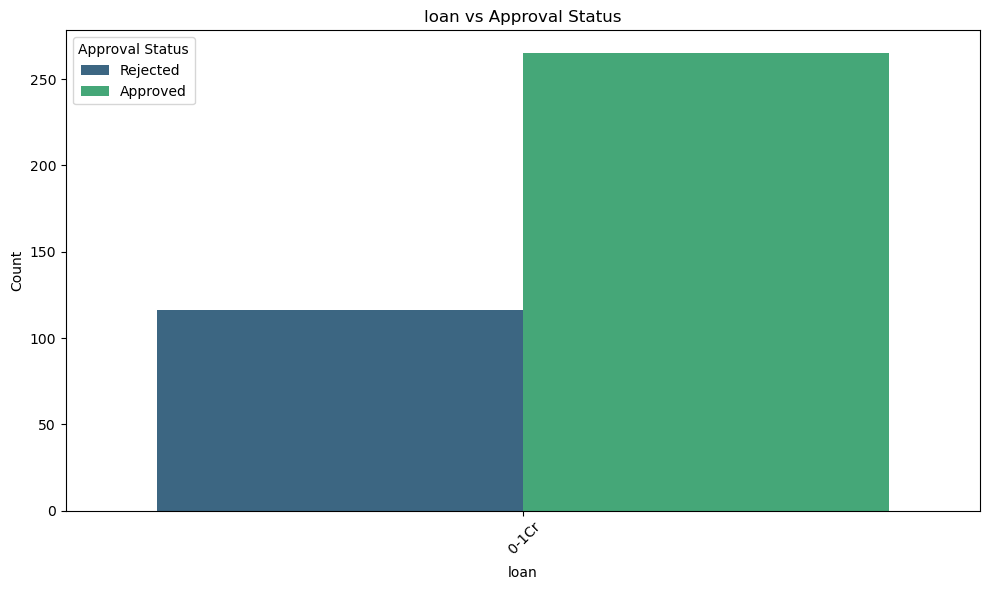

In [34]:
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['Loan_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: investment vs Approval Status")
print(loan_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between loan amount and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between loan amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Loan_bins', hue='approval_status', palette='viridis')
plt.title('loan vs Approval Status')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: previous_loan_experience vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 2.4239046614957602
P-Value: 0.2976156676463455
Degrees of Freedom: 2

Expected Frequencies Table:
approval_status             Approved    Rejected
previous_loan_experience                        
Negative                   52.484043   25.515957
None                      242.234043  117.765957
Positive                  211.281915  102.718085

Fail to reject the null hypothesis: There is no significant association between Loan Exp amount and Approval Status.


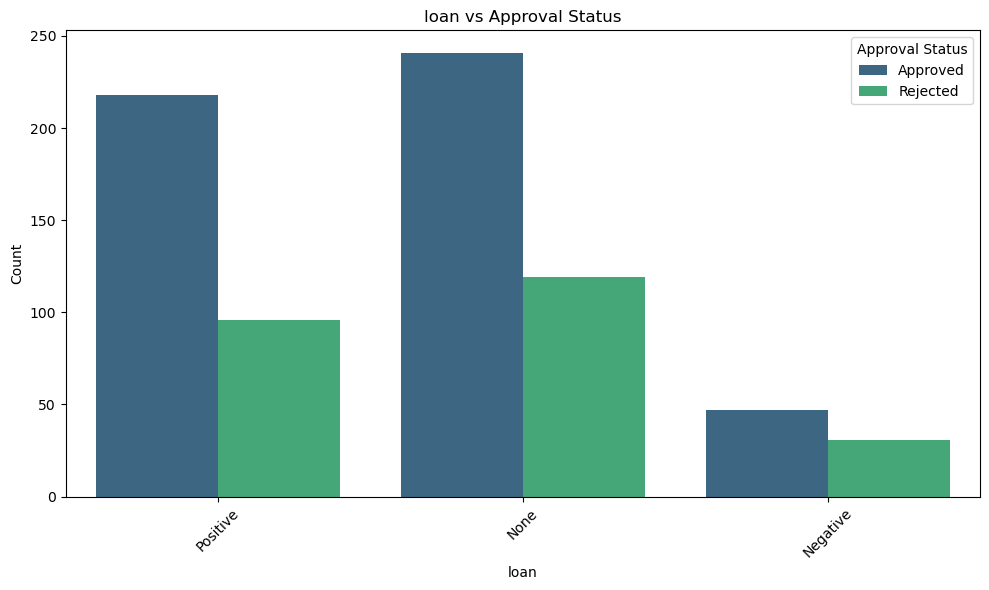

In [29]:

#previous_loan_experience
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['previous_loan_experience'], df['approval_status'])

# Display the contingency table
print("Contingency Table: previous_loan_experience vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Loan Exp and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Loan Exp amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='previous_loan_experience', hue='approval_status', palette='viridis')
plt.title('loan vs Approval Status')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


In [17]:
#cibil_score

#previous_loan_experience
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['cibil_score'], df['approval_status'])

# Display the contingency table
print("Contingency Table: cibil_score vs Approval Status")
print(loan_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between cibil_score and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between cibil_score amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cibil_score', hue='approval_status', palette='viridis')
plt.title('cibil_score vs Approval Status')
plt.xlabel('cibil_score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: cibil_score vs Approval Status
approval_status  Approved  Rejected
cibil_score                        
0                       4         4
310                     1         0
312                     1         0
316                     1         0
319                     0         1
...                   ...       ...
873                     1         0
878                     1         0
893                     1         0
895                     1         0
900                     1         0

[232 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 222.4121584255042
P-Value: 0.645605991220703
Degrees of Freedom: 231

Expected Frequencies Table:
approval_status  Approved  Rejected
cibil_score                        
0                5.564304  2.435696
310              0.695538  0.304462
312              0.695538  0.304462
316              0.695538  0.304462
319              0.695538  0.304462
...                   ...       ...
873              0.69553

In [21]:

#term_bins

# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['loan_term_yrs'], df['approval_status'])

# Display the contingency table
print("Contingency Table: term_bins vs Approval Status")
print(loan_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between term_bins and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between term_bins amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_term_yrs', hue='approval_status', palette='viridis')
plt.title('term_bins vs Approval Status')
plt.xlabel('term_bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: term_bins vs Approval Status
approval_status  Approved  Rejected
loan_term_yrs                      
5                      43        20
10                     47        19
15                     43        17
20                     49        30
25                     44        10
30                     39        20

Chi-Square Test Results:
Chi-Square Statistic: 6.336757502138982
P-Value: 0.2748159582239236
Degrees of Freedom: 5

Expected Frequencies Table:
approval_status   Approved   Rejected
loan_term_yrs                        
5                43.818898  19.181102
10               45.905512  20.094488
15               41.732283  18.267717
20               54.947507  24.052493
25               37.559055  16.440945
30               41.036745  17.963255

Fail to reject the null hypothesis: There is no significant association between term_bins amount and Approval Status.


In [23]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Define a function to conduct a Two-Sample T-Test for a given feature
def conduct_ttest(feature):
    approved_values = approved_df[feature].dropna()  # Drop missing values if any
    rejected_values = rejected_df[feature].dropna()  # Drop missing values if any

    # Perform the Two-Sample T-Test
    t_stat, p_value = ttest_ind(approved_values, rejected_values)

    # Print the results
    print(f"\nTwo-Sample T-Test for {feature}:")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_value}")
    
    # Interpret the results
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in the mean {feature} between approved and rejected applications.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in the mean {feature} between approved and rejected applications.")

# Perform T-Tests for each feature
features_to_analyze = ['DTI', 'MonthlySalary', 'investment_portfolio_value','cibil_score']
for feature in features_to_analyze:
    conduct_ttest(feature)



Two-Sample T-Test for DTI:
T-Statistic: 0.9670614480787126
P-Value: 0.33413000308257645
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between approved and rejected applications.

Two-Sample T-Test for MonthlySalary:
T-Statistic: -2.000851984016925
P-Value: 0.046121087661658254
Reject the null hypothesis: There is a significant difference in the mean MonthlySalary between approved and rejected applications.

Two-Sample T-Test for investment_portfolio_value:
T-Statistic: -0.059693386332423465
P-Value: 0.9524313018424253
Fail to reject the null hypothesis: There is no significant difference in the mean investment_portfolio_value between approved and rejected applications.

Two-Sample T-Test for cibil_score:
T-Statistic: 0.4515160048611616
P-Value: 0.6518759500232859
Fail to reject the null hypothesis: There is no significant difference in the mean cibil_score between approved and rejected applications.


In [24]:
import pandas as pd
from scipy.stats import f_oneway


# Define a function to conduct One-Way ANOVA for a given numeric feature and categorical group
def conduct_anova(feature, group_by):
    # Group the data by the categorical variable and collect the feature values in each group
    unique_groups = df[group_by].unique()
    groups_data = [df[df[group_by] == group][feature].dropna() for group in unique_groups]

    # Perform One-Way ANOVA
    f_stat, p_value = f_oneway(*groups_data)

    # Print the results
    print(f"\nOne-Way ANOVA for {feature} by {group_by}:")
    print(f"F-Statistic: {f_stat}")
    print(f"P-Value: {p_value}")

    # Interpret the results
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in the mean {feature} between different {group_by} categories.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in the mean {feature} between different {group_by} categories.")

# Perform ANOVA for Loan Amount vs. Employment Type
conduct_anova('loan_amount', 'employment_type')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'income_buckets')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'cibil_score')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'previous_loan_experience')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'Savings_bins')





One-Way ANOVA for loan_amount by employment_type:
F-Statistic: 0.6159301621479472
P-Value: 0.6050370962456875
Fail to reject the null hypothesis: There is no significant difference in the mean loan_amount between different employment_type categories.

One-Way ANOVA for DTI by income_buckets:
F-Statistic: 78.86636572588189
P-Value: 1.2880367000351284e-39
Reject the null hypothesis: There is a significant difference in the mean DTI between different income_buckets categories.

One-Way ANOVA for DTI by cibil_score:
F-Statistic: 1.3654020495929
P-Value: 0.019919450288674805
Reject the null hypothesis: There is a significant difference in the mean DTI between different cibil_score categories.

One-Way ANOVA for DTI by previous_loan_experience:
F-Statistic: 1.107959237503541
P-Value: 0.3313022015672712
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between different previous_loan_experience categories.

One-Way ANOVA for DTI by Savings_bins:
F-Statist